Accuracy: 0.885593220338983
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.75      0.60      0.67        10
           2       1.00      0.97      0.98        32
           3       0.87      1.00      0.93        13
           4       1.00      0.93      0.97        30
           5       0.93      1.00      0.96        40
           6       0.80      0.89      0.84         9
           7       0.44      0.44      0.44         9
           8       0.56      0.62      0.59         8
           9       0.90      0.64      0.75        14
          10       0.81      0.81      0.81        16
          11       0.93      0.93      0.93        28
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        17

    accuracy                           0.89       236
   macro avg       0.82      0.83      0.82       236
weighted avg       0.89      

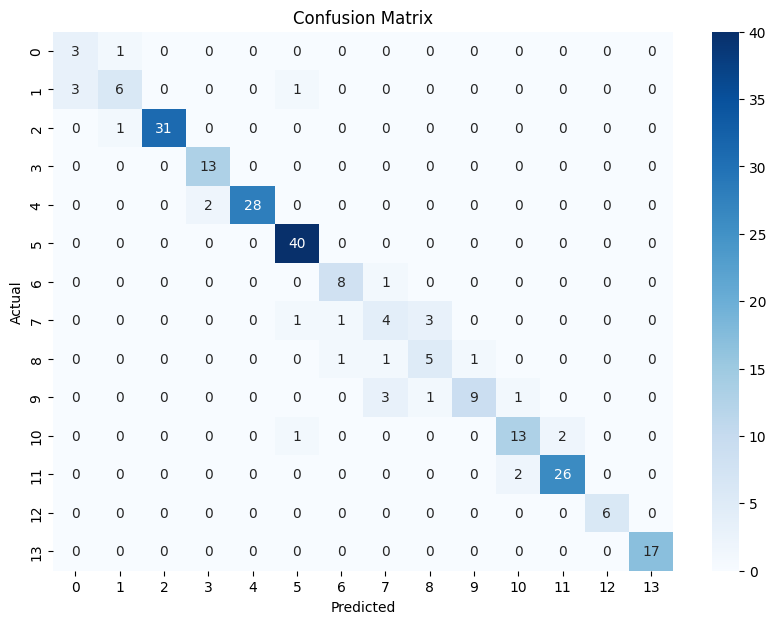

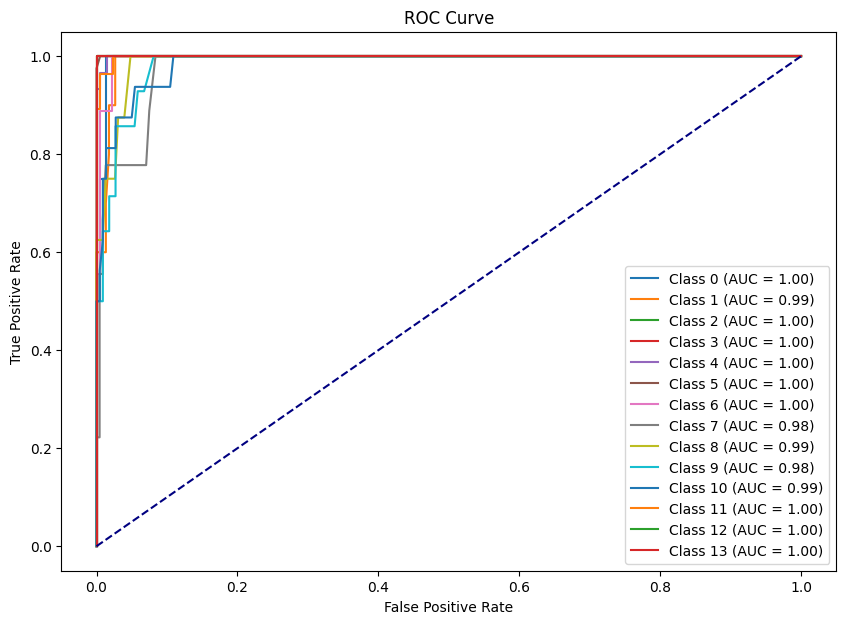

In [2]:
#Simple random forest using processed 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Processed.csv')

# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)  # Use this for ROC curve

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (only for binary classification or using One-vs-Rest for multi-class)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(rf_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.968013468013468
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        45
           2       0.96      1.00      0.98        47
           3       0.98      0.94      0.96        52
           4       0.93      0.97      0.95        40
           5       0.98      0.91      0.95        47
           6       0.96      0.98      0.97        46
           7       0.98      1.00      0.99        45
           8       0.97      0.94      0.95        32
           9       0.98      0.98      0.98        43
          10       0.95      0.91      0.93        44
          11       0.92      1.00      0.96        44
          12       1.00      0.94      0.97        35
          13       0.97      1.00      0.99        39
          14       1.00      1.00      1.00        35

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      

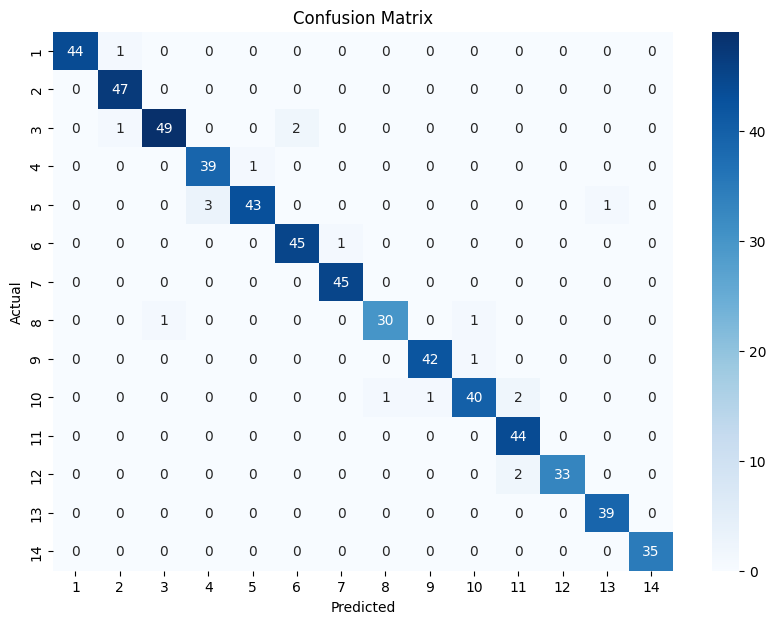

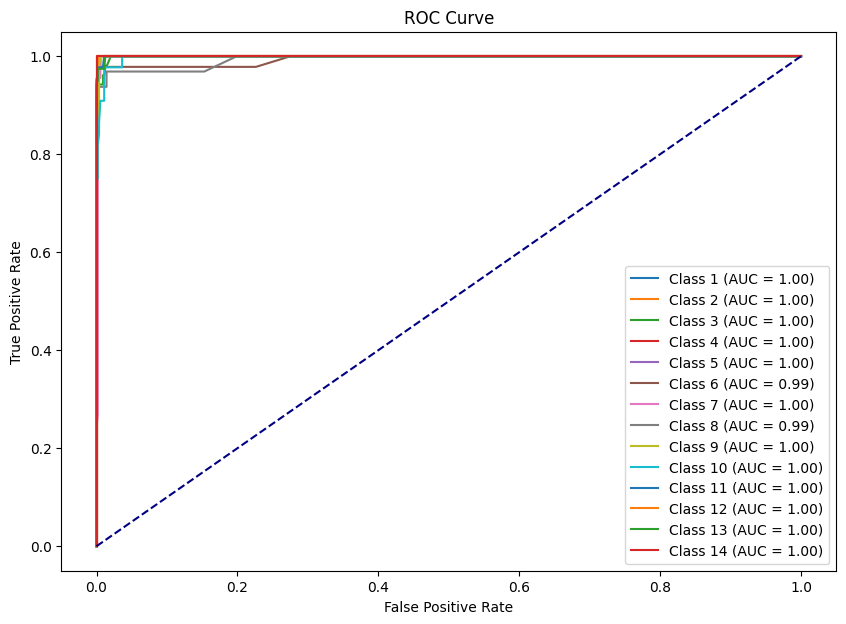

In [3]:
#Simple random forest using balanced_smote
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('balanced_smote.csv')

# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)  # Use this for ROC curve

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (only for binary classification or using One-vs-Rest for multi-class)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(rf_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.9792387543252595
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        16
           7       1.00      0.82      0.90        11
           8       0.85      0.85      0.85        13
           9       1.00      1.00      1.00        18
          10       0.73      1.00      0.85        11
          11       1.00      0.92      0.96        26
          12       1.00      1.00      1.00        23
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        21

    accuracy                           0.98       289
   macro avg       0.97      0.97      0.97       289
weighted avg       0.98     

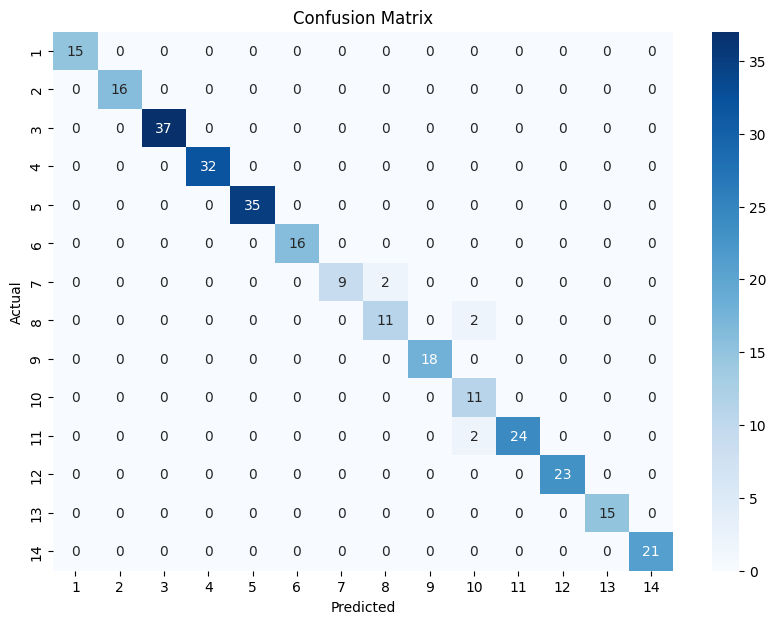

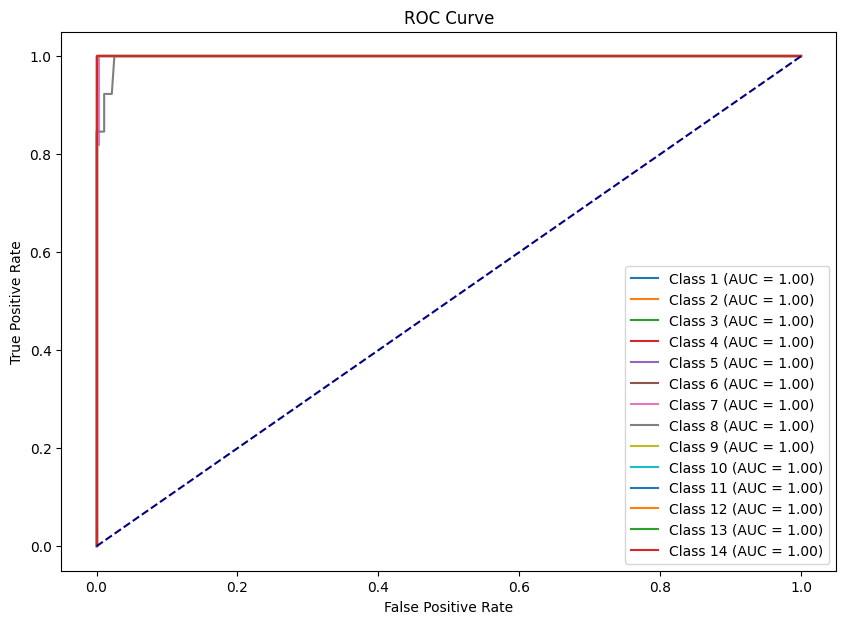

In [4]:
#Simple random forest using balanced_smoteenn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('balanced_smoteenn.csv')

# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)  # Use this for ROC curve

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (only for binary classification or using One-vs-Rest for multi-class)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(rf_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
